In [1]:
import os
import re
import pandas as pd
import numpy as np

# Combine both Train and Test Datasets

In [2]:
test = pd.read_csv('C:/Users/Sinan/Desktop/train.csv')
train = pd.read_csv('C:/Users/Sinan/Desktop/test.csv')

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Train ve test veri setlerini birleştir
data = pd.concat([train, test], axis=0)

veri üzerinde genellemeyi artırmak ve daha tutarlı sonuçlar elde etmektir. Aynı tür veriye sahip olan bu iki veri setini birleştirerek, modelin daha kapsamlı bir görüntü elde etmesi sağlanır.

In [6]:
data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [7]:
data.shape

(2919, 81)

In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [11]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

# Remove Low Corelation Columns 

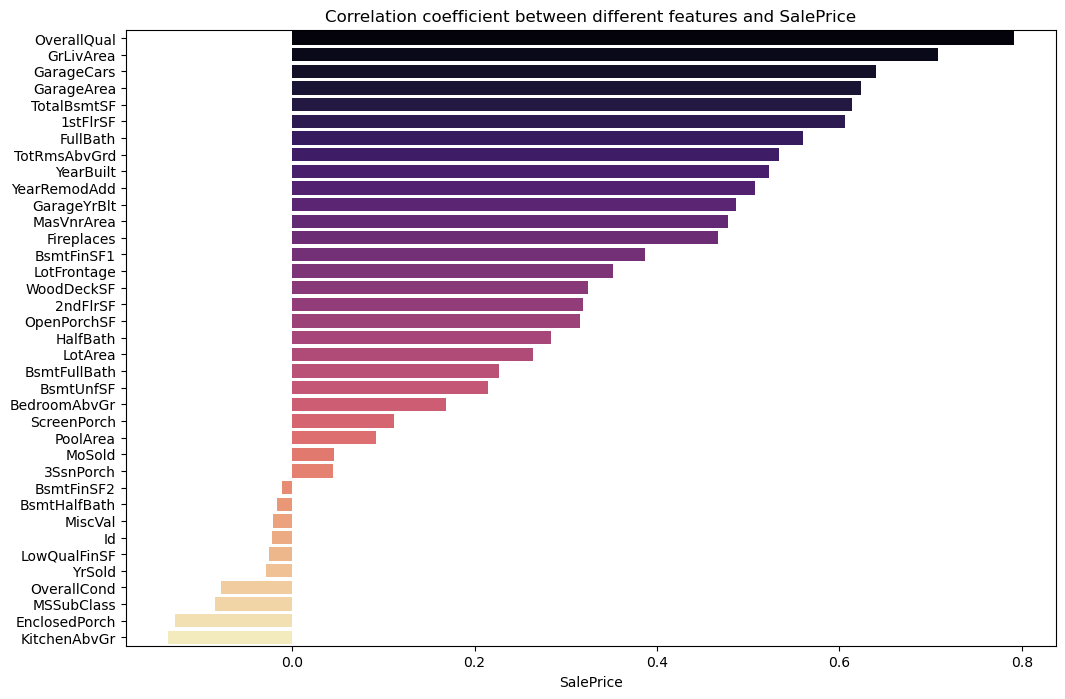

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train ve test veri setlerini birleştir
data = pd.concat([train, test], axis=0)

plt.figure(figsize=(12, 8))
data_corr = data.corr()["SalePrice"].sort_values(ascending=False)
indices = data_corr.index[1:]
corr = data_corr[1:]

sns.barplot(x=corr, y=indices, palette='magma')
plt.title('Correlation coefficient between different features and SalePrice')
plt.show()


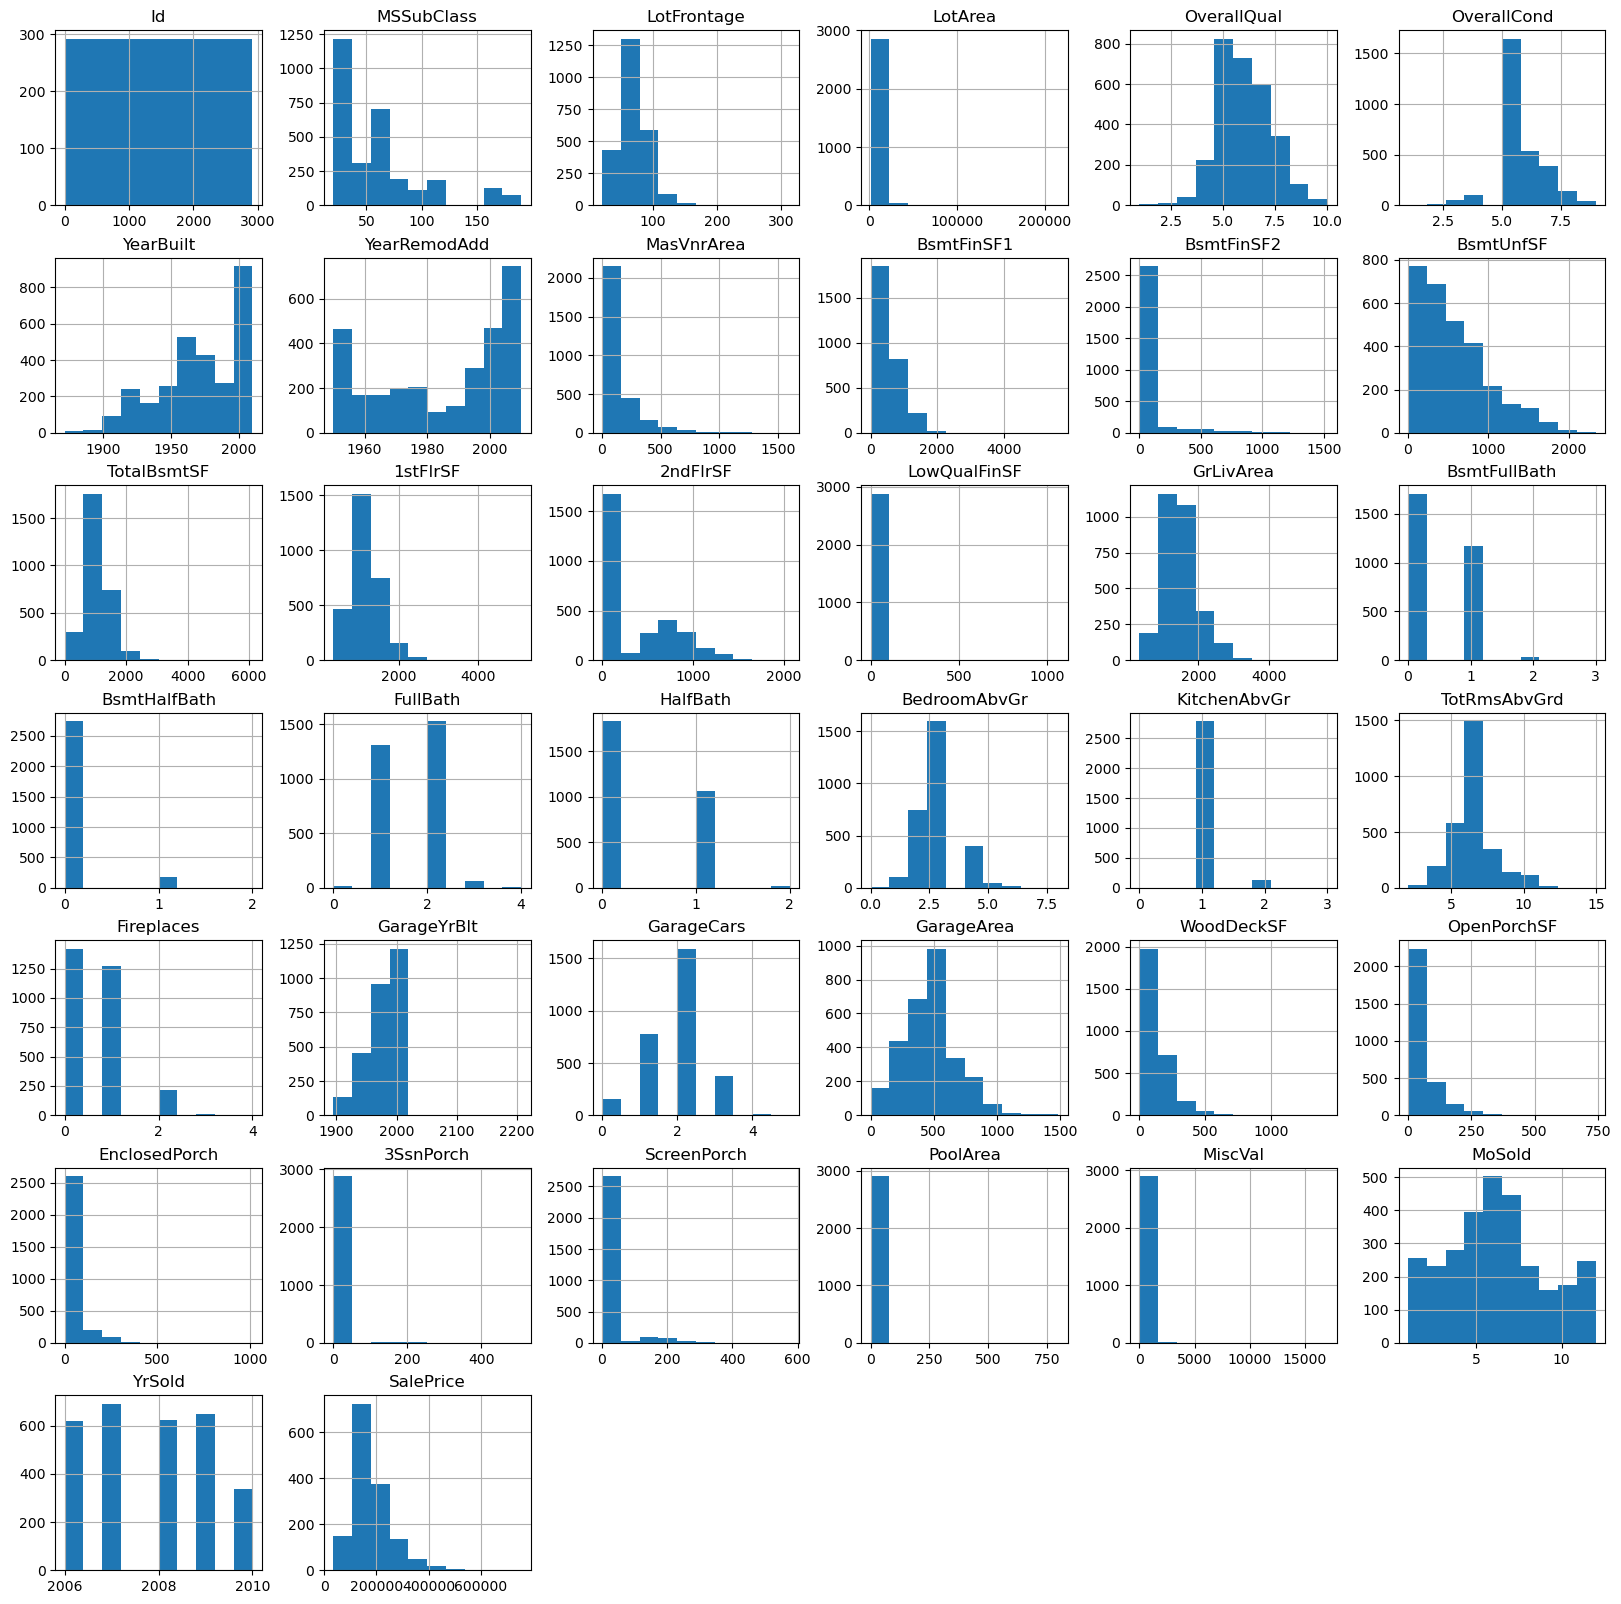

In [13]:
import matplotlib.pyplot as plt
data.hist(figsize=(20, 20))
plt.show()

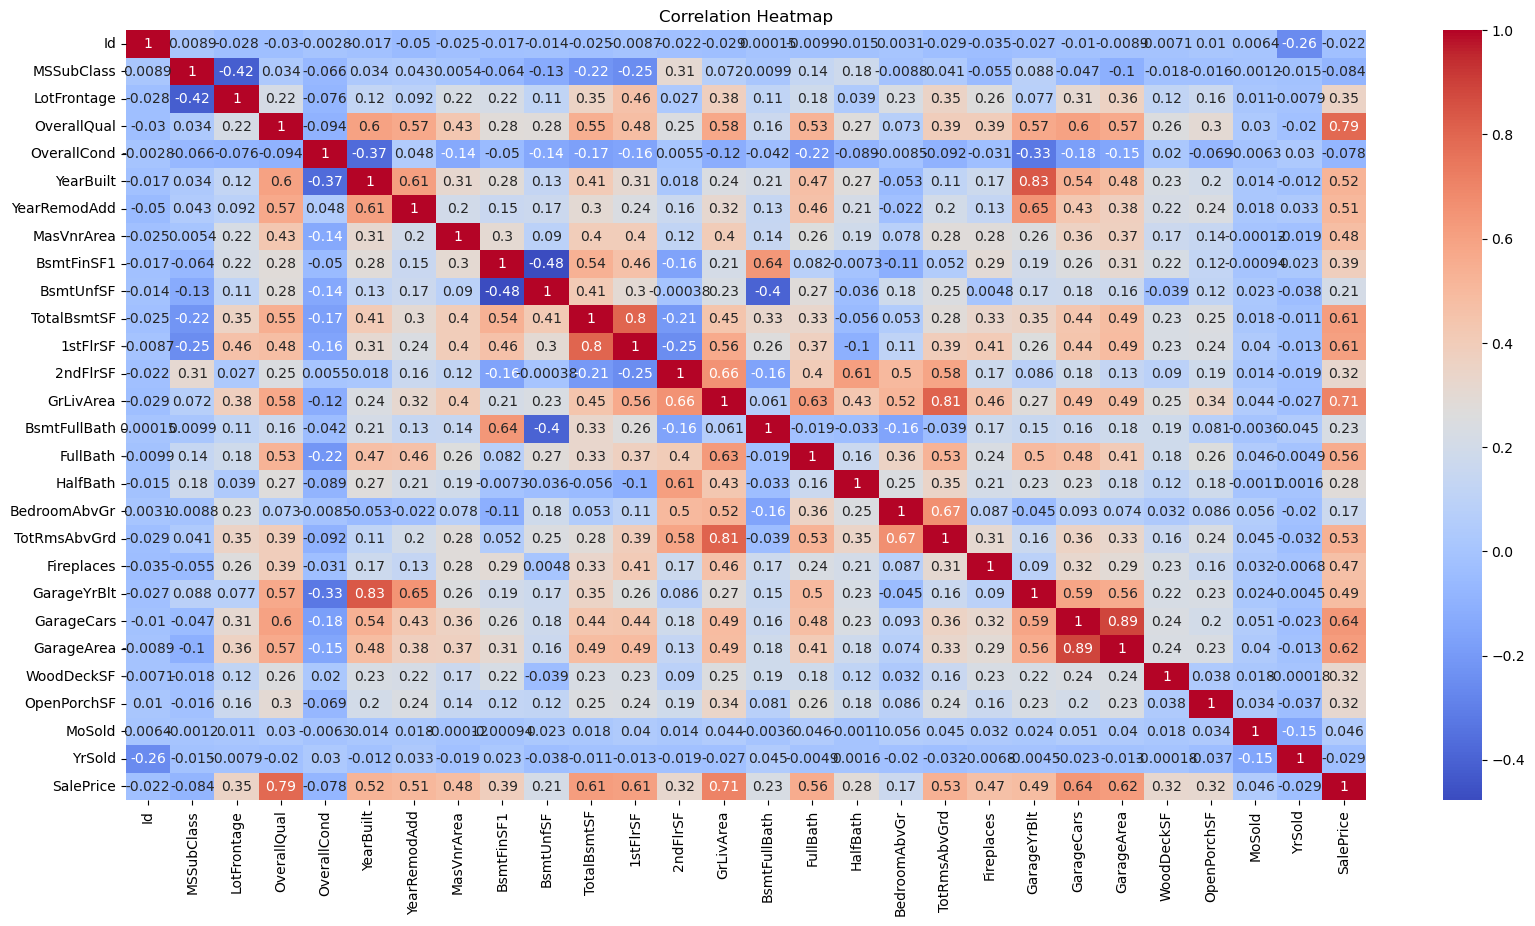

In [50]:
#heatmap
plt.figure(figsize=(20, 10))

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
columns_to_drop = ['LotArea', 'ScreenPorch','PoolArea','MiscVal','3SsnPorch','BsmtHalfBath','LowQualFinSF','EnclosedPorch','BsmtFinSF2','KitchenAbvGr']  # Add the names of columns you want to drop
data= data.drop(columns=columns_to_drop, axis=1)
data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage Street Alley LotShape  \
0     1461          20       RH         80.0   Pave   NaN      Reg   
1     1462          20       RL         81.0   Pave   NaN      IR1   
2     1463          60       RL         74.0   Pave   NaN      IR1   
3     1464          60       RL         78.0   Pave   NaN      IR1   
4     1465         120       RL         43.0   Pave   NaN      IR1   
...    ...         ...      ...          ...    ...   ...      ...   
1455  1456          60       RL         62.0   Pave   NaN      Reg   
1456  1457          20       RL         85.0   Pave   NaN      Reg   
1457  1458          70       RL         66.0   Pave   NaN      Reg   
1458  1459          20       RL         68.0   Pave   NaN      Reg   
1459  1460          20       RL         75.0   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... WoodDeckSF OpenPorchSF PoolQC  \
0            Lvl    AllPub    Inside  ...        1

# Data Types of Available Data Columns

In [16]:
unique_dtypes = data.dtypes.unique()

print("Unique Data Types:")
for dtype in unique_dtypes:
    print(dtype)

Unique Data Types:
int64
object
float64


In [17]:
integer_columns = data.select_dtypes(include=['int']).columns

for column in integer_columns:
    print(f"Column: {column}, Data Type: {data[column].dtype}")

Column: Id, Data Type: int64
Column: MSSubClass, Data Type: int64
Column: OverallQual, Data Type: int64
Column: OverallCond, Data Type: int64
Column: YearBuilt, Data Type: int64
Column: YearRemodAdd, Data Type: int64
Column: 1stFlrSF, Data Type: int64
Column: 2ndFlrSF, Data Type: int64
Column: GrLivArea, Data Type: int64
Column: FullBath, Data Type: int64
Column: HalfBath, Data Type: int64
Column: BedroomAbvGr, Data Type: int64
Column: TotRmsAbvGrd, Data Type: int64
Column: Fireplaces, Data Type: int64
Column: WoodDeckSF, Data Type: int64
Column: OpenPorchSF, Data Type: int64
Column: MoSold, Data Type: int64
Column: YrSold, Data Type: int64


In [18]:
object_columns = data.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Column: {column}, Data Type: {data[column].dtype}")

Column: MSZoning, Data Type: object
Column: Street, Data Type: object
Column: Alley, Data Type: object
Column: LotShape, Data Type: object
Column: LandContour, Data Type: object
Column: Utilities, Data Type: object
Column: LotConfig, Data Type: object
Column: LandSlope, Data Type: object
Column: Neighborhood, Data Type: object
Column: Condition1, Data Type: object
Column: Condition2, Data Type: object
Column: BldgType, Data Type: object
Column: HouseStyle, Data Type: object
Column: RoofStyle, Data Type: object
Column: RoofMatl, Data Type: object
Column: Exterior1st, Data Type: object
Column: Exterior2nd, Data Type: object
Column: MasVnrType, Data Type: object
Column: ExterQual, Data Type: object
Column: ExterCond, Data Type: object
Column: Foundation, Data Type: object
Column: BsmtQual, Data Type: object
Column: BsmtCond, Data Type: object
Column: BsmtExposure, Data Type: object
Column: BsmtFinType1, Data Type: object
Column: BsmtFinType2, Data Type: object
Column: Heating, Data Type: 

In [19]:
float_columns = data.select_dtypes(include=['float']).columns

for column in float_columns:
    print(f"Column: {column}, Data Type: {data[column].dtype}")

Column: LotFrontage, Data Type: float64
Column: MasVnrArea, Data Type: float64
Column: BsmtFinSF1, Data Type: float64
Column: BsmtUnfSF, Data Type: float64
Column: TotalBsmtSF, Data Type: float64
Column: BsmtFullBath, Data Type: float64
Column: GarageYrBlt, Data Type: float64
Column: GarageCars, Data Type: float64
Column: GarageArea, Data Type: float64
Column: SalePrice, Data Type: float64


# Let's do the One Hot Encoding & Label Encoding

**1. One Hot Encoding**

In [20]:
# Perform one-hot encoding
# kategorik olan ve sayısal olmayan sütunlar seçiliyor
data_one_hot_encoded = pd.get_dummies(data, columns=['MSSubClass', 'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 'Condition1',
       'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType','Foundation','Heating','GarageType','GarageFinish','Fence','MiscFeature','Electrical','Functional','PavedDrive', 'SaleType', 'SaleCondition','MoSold'])
data_one_hot_encoded.head(10)

,Id,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,1461,80.0,5,6,1961,1961,0.0,TA,TA,TA,...,0,0,0,1,0,0,0,0,0,0
1,1462,81.0,6,6,1958,1958,108.0,TA,TA,TA,...,0,0,0,1,0,0,0,0,0,0
2,1463,74.0,5,5,1997,1998,0.0,TA,TA,Gd,...,1,0,0,0,0,0,0,0,0,0
3,1464,78.0,6,6,1998,1998,20.0,TA,TA,TA,...,0,0,0,1,0,0,0,0,0,0
4,1465,43.0,8,5,1992,1992,0.0,Gd,TA,Gd,...,0,0,0,0,0,0,0,0,0,0
5,1466,75.0,6,5,1993,1994,0.0,TA,TA,Gd,...,0,1,0,0,0,0,0,0,0,0
6,1467,NaN,6,7,1992,2007,0.0,TA,Gd,Gd,...,1,0,0,0,0,0,0,0,0,0
7,1468,63.0,6,5,1998,1998,0.0,TA,TA,Gd,...,0,0,1,0,0,0,0,0,0,0
8,1469,85.0,7,5,1990,1990,0.0,TA,TA,Gd,...,0,0,0,0,0,0,0,0,0,0
9,1470,70.0,4,5,1970,1970,0.0,TA,TA,TA,...,0,1,0,0,0,0,0,0,0,0


**2. Label Encoding**

In [21]:
columns_to_encode =['ExterQual','ExterCond','GarageQual','GarageCond','PoolQC', 'BsmtQual','FireplaceQu', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Seçilen sütunlara Label Encoding uygula
for column in columns_to_encode:
    data_one_hot_encoded[column] = label_encoder.fit_transform(data_one_hot_encoded[column])
    

processedData = data_one_hot_encoded

In [22]:
processedData.head()

,Id,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,1461,80.0,5,6,1961,1961,0.0,3,4,3,...,0,0,0,1,0,0,0,0,0,0
1,1462,81.0,6,6,1958,1958,108.0,3,4,3,...,0,0,0,1,0,0,0,0,0,0
2,1463,74.0,5,5,1997,1998,0.0,3,4,2,...,1,0,0,0,0,0,0,0,0,0
3,1464,78.0,6,6,1998,1998,20.0,3,4,3,...,0,0,0,1,0,0,0,0,0,0
4,1465,43.0,8,5,1992,1992,0.0,2,4,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
processedData.shape

(2919, 258)

"Label Encoding" ile sıralama ilişkisi içeren sütunlarınızı dönüştürürken, "One Hot Encoding" ile sıralama ilişkisi içermeyen sütunlarınızı dönüştürüyorsunuz. Böylece her bir kategori türü için en uygun kodlama yöntemini kullanarak verilerinizi modele entegre ediyorsunuz. Sıralama ilişkisi içeren sütunlar, içerdikleri kategorik değerlerin bir sıralama veya derecelendirme düzenine sahip olduğu sütunlardır. Örneğin, "yüksek", "orta" ve "düşük" gibi değerlerin olduğu bir sütun sıralama ilişkisi içerir. Sıralama ilişkisi içermeyen sütunlar ise, içerdikleri kategorik değerlerin bir sıralama düzeni olmadığı sütunlardır.

# ML Model Training & Predicting

In [24]:
# Id sütununa göre bölme
condition = processedData['Id'] <= 1460

#ilk 1460 örneklik verinin train verisi, sonraki örneklik verinin ise test
df_1460_and_below = processedData[condition]
df_above_1460 = processedData[~condition]

In [25]:
df_1460_and_below.head()

,Id,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,1,65.0,7,5,2003,2003,196.0,2,4,2,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,6,8,1976,1976,0.0,3,4,2,...,0,0,1,0,0,0,0,0,0,0
2,3,68.0,7,5,2001,2002,162.0,2,4,2,...,0,0,0,0,0,0,1,0,0,0
3,4,60.0,7,5,1915,1970,0.0,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,8,5,2000,2000,350.0,2,4,2,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df_above_1460.head()

,Id,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
0,1461,80.0,5,6,1961,1961,0.0,3,4,3,...,0,0,0,1,0,0,0,0,0,0
1,1462,81.0,6,6,1958,1958,108.0,3,4,3,...,0,0,0,1,0,0,0,0,0,0
2,1463,74.0,5,5,1997,1998,0.0,3,4,2,...,1,0,0,0,0,0,0,0,0,0
3,1464,78.0,6,6,1998,1998,20.0,3,4,3,...,0,0,0,1,0,0,0,0,0,0
4,1465,43.0,8,5,1992,1992,0.0,2,4,2,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_1460_and_below['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [28]:
df_above_1460['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [29]:
df_cleaned = df_1460_and_below.dropna() # NaN değerleri içeren satırları çıkar
df_cleaned .shape  # Temizlenmiş veri setinin boyutunu göster


(1121, 258)

In [30]:
#df_above_1460 veri seti df_above_1460_no_saleprice adlı bir değişkene atanır
df_above_1460_no_saleprice = df_above_1460.drop(columns=['SalePrice']) # 'SalePrice' sütununu çıkar

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Verilerinizi df_1460_and_below'a yükleyin

# Define X (features) and y (target)
X = df_cleaned.drop(columns=['SalePrice'])  # Drop the target column
y = df_cleaned['SalePrice']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

# Test Model

In [32]:
nan_count = df_above_1460_no_saleprice.isna().sum()

# Get columns with more than 0 NaN values
columns_with_nan = nan_count[nan_count > 0].index

print("Columns with more than 0 NaN values:")
print(columns_with_nan)

Columns with more than 0 NaN values:
Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')


In [33]:
df_above_1460_no_saleprice.shape

(1459, 257)

**We need to remove NaN values in also test dataset but can't use dropna**

In [34]:
# belirli sütunlarda bulunan NaN (boş) değerleri ortalama değer ile dolduruyorsunuz.
columns_with_nan = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                    'BsmtFullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

# Fill NaN values in specific columns with mean
for column in columns_with_nan:
    mean_value = df_above_1460_no_saleprice[column].mean()
    df_above_1460_no_saleprice[column].fillna(mean_value, inplace=True)


cleanded_test = df_above_1460_no_saleprice
print("DataFrame after filling NaN values with mean:")
print(cleanded_test)

DataFrame after filling NaN values with mean:
        Id  LotFrontage  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1461         80.0            5            6       1961          1961   
1     1462         81.0            6            6       1958          1958   
2     1463         74.0            5            5       1997          1998   
3     1464         78.0            6            6       1998          1998   
4     1465         43.0            8            5       1992          1992   
...    ...          ...          ...          ...        ...           ...   
1454  2915         21.0            4            7       1970          1970   
1455  2916         21.0            4            5       1970          1970   
1456  2917        160.0            5            7       1960          1996   
1457  2918         62.0            5            5       1992          1992   
1458  2919         74.0            7            5       1993          1994   

      MasVnrArea 

In [35]:
#nan değer yok
nan_count = cleanded_test.isna().sum()

# Get columns with more than 0 NaN values
columns_with_nan = nan_count[nan_count > 0].index

print("Columns with more than 0 NaN values:")
print(columns_with_nan)

Columns with more than 0 NaN values:
Index([], dtype='object')


In [36]:
# Make predictions
df_above_1460_no_saleprice_cleaned = cleanded_test
y_pred = model.predict(df_above_1460_no_saleprice_cleaned)
print(y_pred)


[121469.62310576 166611.54457741 178425.31414098 ... 176734.02271326
  98611.53323833 240099.26375746]


In [37]:
# Create a DataFrame with 'Id' and predicted values
prediction_df = pd.DataFrame({
    'Id': df_above_1460_no_saleprice_cleaned['Id'],  # Assuming 'Id' column exists
    'Predicted_SalePrice': y_pred
})

print("Predicted values DataFrame:")
print(prediction_df)

Predicted values DataFrame:
        Id  Predicted_SalePrice
0     1461        121469.623106
1     1462        166611.544577
2     1463        178425.314141
3     1464        178795.284218
4     1465        223446.049713
...    ...                  ...
1454  2915         57399.583565
1455  2916         64296.080965
1456  2917        176734.022713
1457  2918         98611.533238
1458  2919        240099.263757

[1459 rows x 2 columns]


# Let's Use Random Forest & Gradient Boosting

In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

GradientBoostingRegressor()

In [39]:
rf_y_pred = rf_model.predict(df_above_1460_no_saleprice_cleaned)
print(rf_y_pred)

[123148.5  158396.16 177744.04 ... 148758.92 132496.29 240705.55]


In [40]:
gb_y_pred = gb_model.predict(df_above_1460_no_saleprice_cleaned)
print(gb_y_pred)

[123098.8712633  148425.02121027 179576.04800841 ... 163738.04030099
 137286.59878934 238705.88276346]


In [41]:
# Create a DataFrame with 'Id' and predicted values
rprediction_df = pd.DataFrame({
    'Id': df_above_1460_no_saleprice_cleaned['Id'],  # Assuming 'Id' column exists
    'SalePrice': rf_y_pred
})

print("Predicted values DataFrame:")
print(rprediction_df)

Predicted values DataFrame:
        Id  SalePrice
0     1461  123148.50
1     1462  158396.16
2     1463  177744.04
3     1464  184835.59
4     1465  211104.34
...    ...        ...
1454  2915   94079.50
1455  2916   90320.50
1456  2917  148758.92
1457  2918  132496.29
1458  2919  240705.55

[1459 rows x 2 columns]


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini özellikler (X) ve hedef (y) olarak ayırın
X_train = df_cleaned.drop(columns=['SalePrice'])
y_train = df_cleaned['SalePrice']

In [43]:
# Create a DataFrame with 'Id' and predicted values
gprediction_df = pd.DataFrame({
    'Id': df_above_1460_no_saleprice_cleaned['Id'],  # Assuming 'Id' column exists
    'SalePrice': gb_y_pred
})

print("Predicted values DataFrame:")
print(gprediction_df)

Predicted values DataFrame:
        Id      SalePrice
0     1461  123098.871263
1     1462  148425.021210
2     1463  179576.048008
3     1464  181430.089118
4     1465  199895.374991
...    ...            ...
1454  2915   97265.705743
1455  2916   89970.835394
1456  2917  163738.040301
1457  2918  137286.598789
1458  2919  238705.882763

[1459 rows x 2 columns]


In [44]:
# Model Değerlendirmesi ve Tablolaştırma
models = [model, rf_model, gb_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse_scores = []
r2_scores = []

In [45]:
for idx, mdl in enumerate(models):
    y_pred = mdl.predict(X)  # Eğitim veri seti üzerinde tahmin yap
    rmse = np.sqrt(mean_squared_error(y, y_pred))  # RMSE hesapla
    r2 = r2_score(y, y_pred)  # R2 hesapla
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    print(f"{model_names[idx]} - RMSE: {rmse:.4f}, R2: {r2:.4f}")

Linear Regression - RMSE: 22745.6308, R2: 0.9248
Random Forest - RMSE: 12036.7549, R2: 0.9789
Gradient Boosting - RMSE: 14183.0703, R2: 0.9708


In [46]:
# Sonuçları Tablolaştırma
evaluation_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores
})

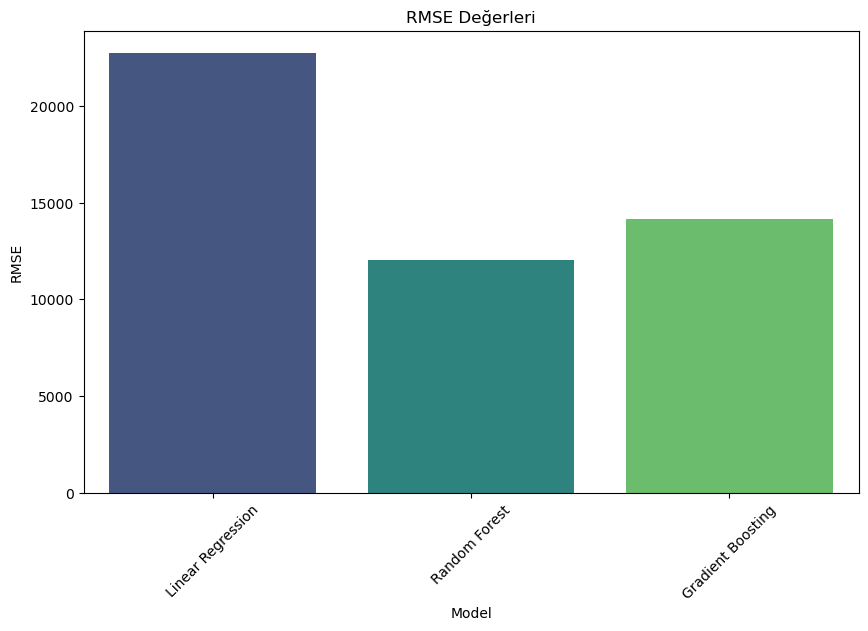

In [47]:
# Grafik olarak modelleri karşılaştırma
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=evaluation_df, palette='viridis')
plt.title('RMSE Değerleri')
plt.xticks(rotation=45)
plt.show()

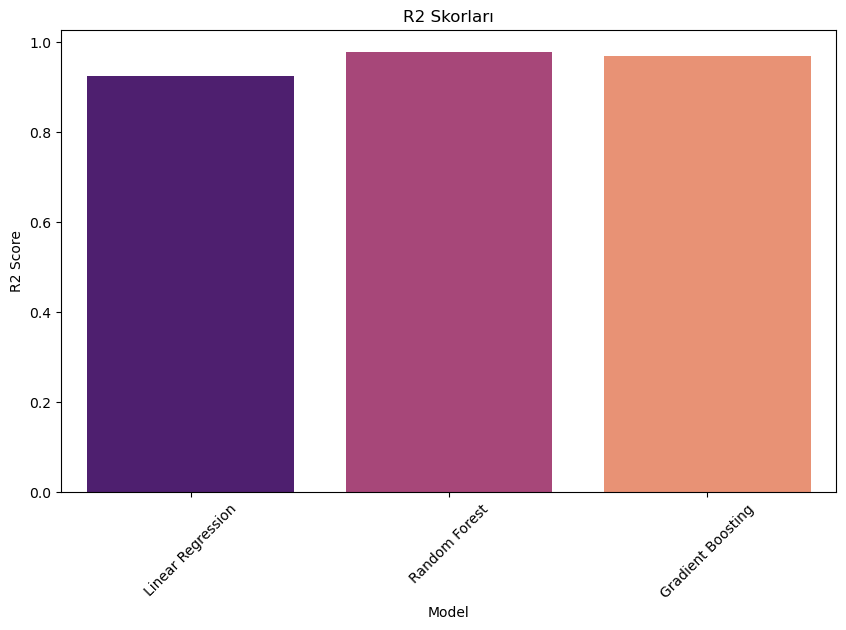

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=evaluation_df, palette='magma')
plt.title('R2 Skorları')
plt.xticks(rotation=45)
plt.show()

In [49]:
# En iyi modeli bulma
best_model_idx = np.argmax(r2_scores)
best_model_name = model_names[best_model_idx]
print(f"En iyi model: {best_model_name}, R2 Skoru: {r2_scores[best_model_idx]:.4f}")

En iyi model: Random Forest, R2 Skoru: 0.9789


Linear Regression: RMSE yüksek, R2 düşük. Model tahminlerinde büyük hatalar var, veriyi iyi açıklayamıyor.
Random Forest: RMSE düşük, R2 yüksek. İyi tahmin yapma yeteneği gösteriyor, özellikle karmaşık veri setlerinde etkilidir.
Gradient Boosting: RMSE biraz yüksek, R2 yine yüksek. İyi tahmin yapma yeteneği var, ancak Random Forest'a göre daha fazla hata içerebilir.